In [ ]:
import pandas as pd
from pycaret.classification import ClassificationExperiment



In [2]:
df = pd.read_csv("../data/dataset_obitos_2020.csv")

In [3]:
df.head()   

,Unnamed: 0,IDADEanos,ESTCIV,ESC,LOCOCOR,bimestre,regiao_intermediaria,obito_cardiovascular
0,1,78,Casado,4 a 7 anos,Hospital,May-Jun,São Paulo,0
1,6,94,Viúvo,Nenhuma,Domicílio,May-Jun,São Paulo,1
2,9,71,Viúvo,1 a 3 anos,Hospital,May-Jun,Bauru,0
3,11,89,Casado,1 a 3 anos,Hospital,May-Jun,Bauru,0
4,16,79,Viúvo,Nenhuma,Hospital,May-Jun,São Paulo,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20372 entries, 0 to 20371
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            20372 non-null  int64 
 1   IDADEanos             20372 non-null  int64 
 2   ESTCIV                20372 non-null  object
 3   ESC                   20372 non-null  object
 4   LOCOCOR               20372 non-null  object
 5   bimestre              20372 non-null  object
 6   regiao_intermediaria  20372 non-null  object
 7   obito_cardiovascular  20372 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 1.2+ MB


In [5]:
df = df.drop(columns=["Unnamed: 0"])

## Setup pycaret

In [6]:
s = ClassificationExperiment()
s.setup(
    data=df,
    target="obito_cardiovascular",
    session_id=123,
    # normalize=True,
    # normalize_method="zscore",
    # transformation=True,
    # transformation_method="yeo-johnson",
    # feature_selection=True,
    # feature_selection_threshold=0.05,
    # remove_multicollinearity=True,
    # multicollinearity_threshold=0.95,
)

,Description,Value
0,Session id,123
1,Target,obito_cardiovascular
2,Target type,Binary
3,Original data shape,"(20372, 7)"
4,Transformed data shape,"(20372, 39)"
5,Transformed train set shape,"(14260, 39)"
6,Transformed test set shape,"(6112, 39)"
7,Numeric features,1
8,Categorical features,5
9,Preprocess,True


In [7]:
s.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7351,0.5899,0.0032,0.4417,0.0063,0.0031,0.0208,0.3790
dummy,Dummy Classifier,0.7351,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0210
ridge,Ridge Classifier,0.7346,0.5902,0.0008,0.3000,0.0016,-0.0001,0.0019,0.0260
ada,Ada Boost Classifier,0.7346,0.5927,0.0056,0.3753,0.0109,0.0042,0.0202,0.0540
gbc,Gradient Boosting Classifier,0.7344,0.5988,0.0093,0.4792,0.0181,0.0072,0.0321,0.1080
lda,Linear Discriminant Analysis,0.7343,0.5902,0.0050,0.4252,0.0099,0.0032,0.0185,0.0240
lightgbm,Light Gradient Boosting Machine,0.7341,0.5793,0.0453,0.4839,0.0826,0.0389,0.0785,0.4170
knn,K Neighbors Classifier,0.6888,0.5289,0.1422,0.3095,0.1944,0.0337,0.0376,0.1370
rf,Random Forest Classifier,0.6602,0.5357,0.2078,0.2978,0.2445,0.0344,0.0354,0.1240
et,Extra Trees Classifier,0.6506,0.5227,0.2282,0.2944,0.2568,0.0335,0.0339,0.1390


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
gbc = s.create_model("gbc")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7307,0.5734,0.0026,0.1250,0.0052,-0.0059,-0.0238
1,0.7356,0.5883,0.0079,0.6000,0.0157,0.0088,0.0450
2,0.7349,0.6054,0.0079,0.5000,0.0156,0.0074,0.0346
3,0.7335,0.6189,0.0106,0.4000,0.0206,0.0071,0.0257
4,0.7349,0.6168,0.0159,0.5000,0.0308,0.0147,0.0490
5,0.7349,0.6143,0.0106,0.5000,0.0207,0.0098,0.0400
6,0.7356,0.6122,0.0053,0.6667,0.0105,0.0064,0.0418
7,0.7356,0.6002,0.0106,0.5714,0.0208,0.0112,0.0487
8,0.7300,0.5639,0.0080,0.2143,0.0153,-0.0037,-0.0113


In [9]:
gbc_tuned = s.tune_model(gbc, n_iter=10, optimize="auc")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7349,0.5726,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.7349,0.5879,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.7349,0.6026,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.7349,0.6237,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.7349,0.6257,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.7349,0.6153,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.7349,0.6055,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.7349,0.6018,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.7356,0.5661,0.0000,0.0000,0.0000,0.0000,0.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits


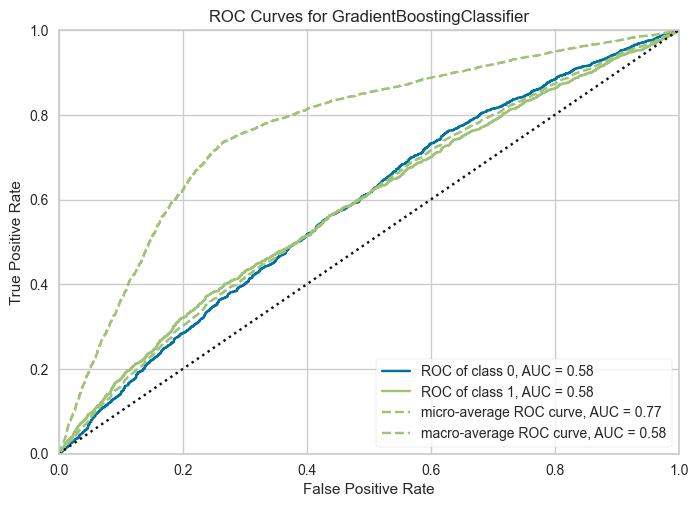

In [11]:
s.plot_model(gbc_tuned, plot="auc")

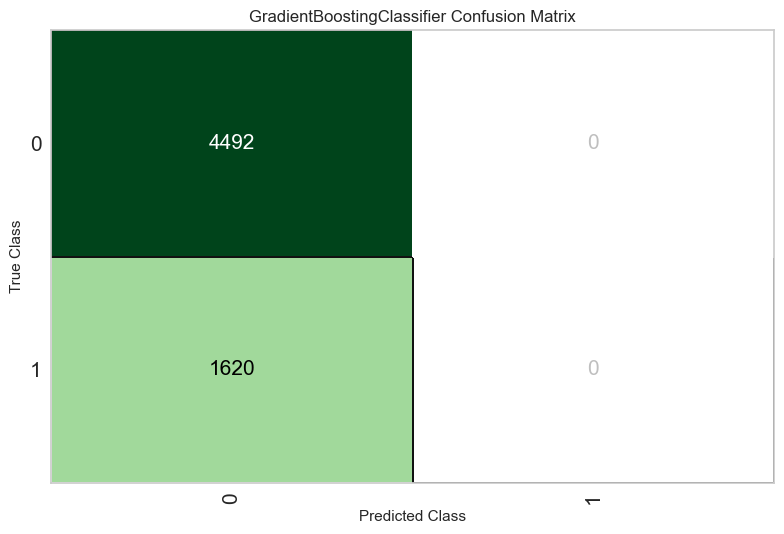

In [12]:
s.plot_model(gbc_tuned, plot="confusion_matrix")

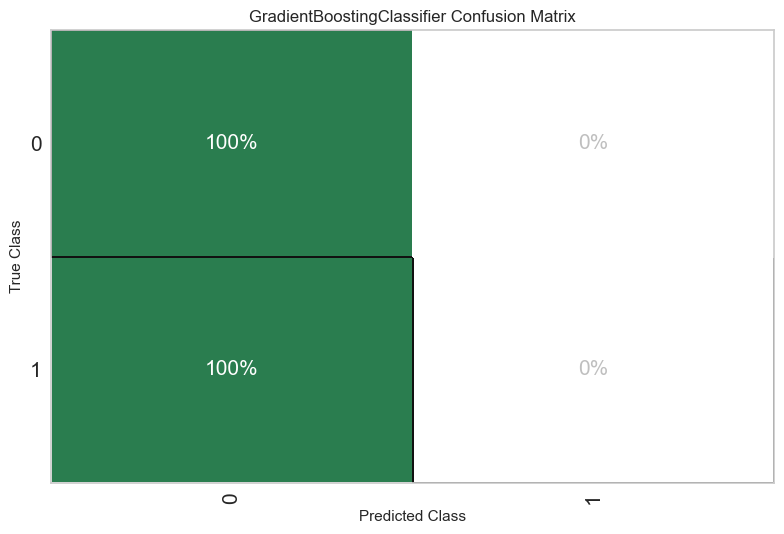

In [13]:
s.plot_model(gbc_tuned, plot="confusion_matrix", plot_kwargs={"percent": True})

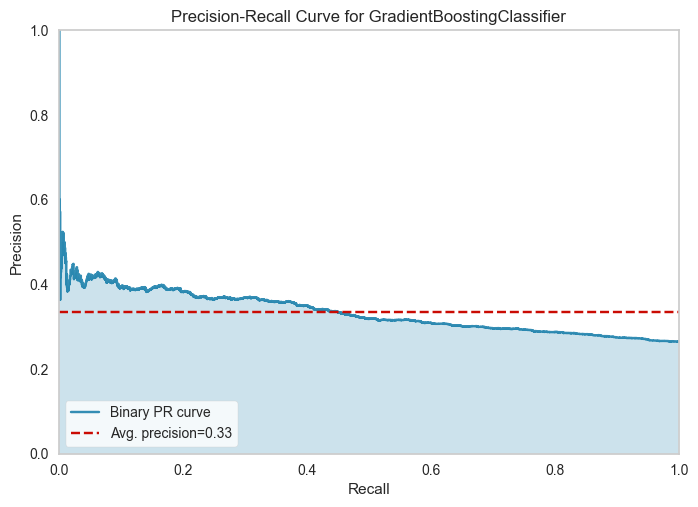

In [14]:
s.plot_model(gbc_tuned, plot="pr")

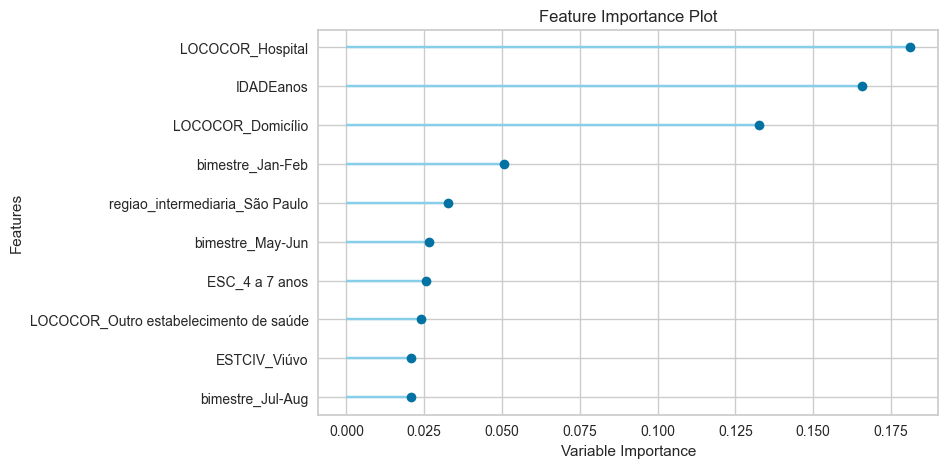

In [15]:
s.plot_model(gbc_tuned, plot="feature")